Loan Prediction using ML

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("//Mac/Home/Downloads/train_ctrUa4K.csv")
test_data = pd.read_csv("//Mac/Home/Downloads/test_lAUu6dG.csv")

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train_data.shape

(614, 13)

In [9]:
test_data.shape

(367, 12)

Univariate Analysis

Univariate Analysis means analysing each variable individuall. Let's divide the data into categorial,numerical and ordinal variables.

categorial - Loan_ID,Gender,Married,Self_Employed,Loan_Status

numerical - Applicant_income,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History

ordinal -  Dependents,Education,Property_Area

As it is the Target variable first we check it's frequency and distribution

In [10]:
train_data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [11]:
train_data['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

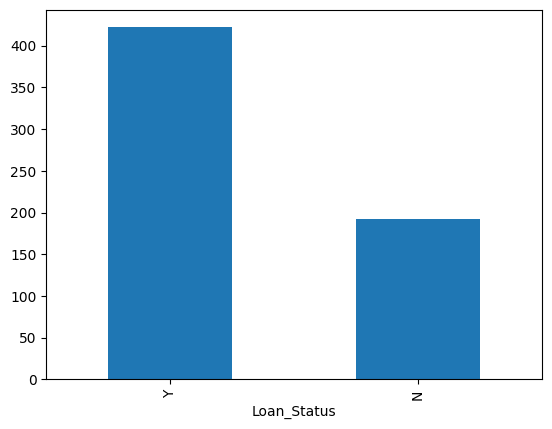

In [12]:
train_data['Loan_Status'].value_counts().plot.bar()

In [13]:
train_data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [14]:
train_data['Gender'].value_counts(normalize=True)

Gender
Male      0.813644
Female    0.186356
Name: proportion, dtype: float64

<Axes: xlabel='Gender'>

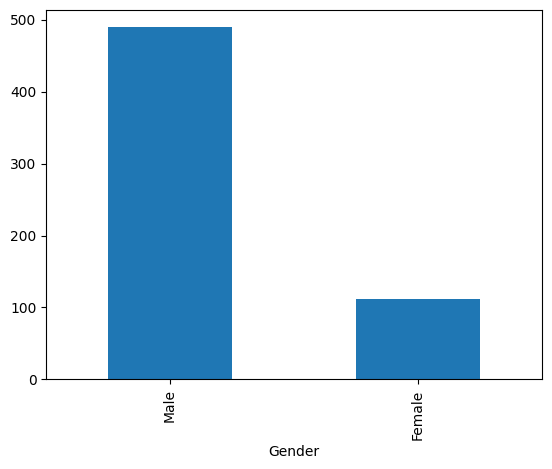

In [15]:
train_data['Gender'].value_counts().plot.bar()

In [16]:
train_data['Married'].value_counts(normalize=True)

Married
Yes    0.651391
No     0.348609
Name: proportion, dtype: float64

<Axes: xlabel='Married'>

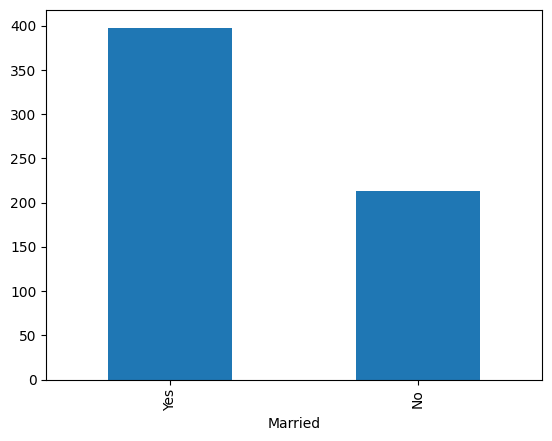

In [17]:
train_data['Married'].value_counts().plot.bar()

In [18]:
train_data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [19]:
train_data['Self_Employed'].value_counts(normalize=True)

Self_Employed
No     0.859107
Yes    0.140893
Name: proportion, dtype: float64

<Axes: xlabel='Self_Employed'>

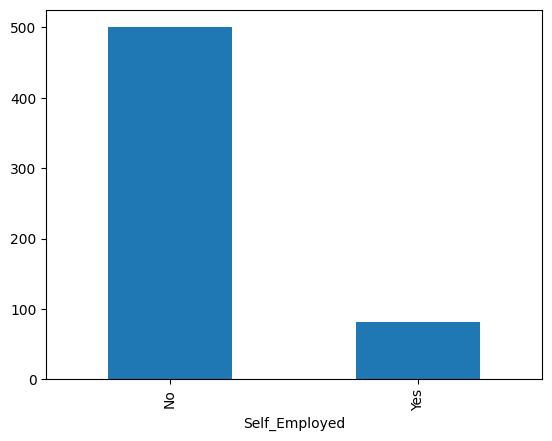

In [20]:
train_data['Self_Employed'].value_counts().plot.bar()

<Axes: xlabel='Dependents'>

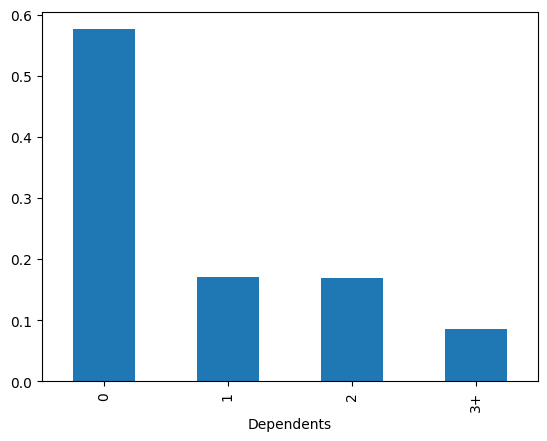

In [21]:
train_data['Dependents'].value_counts(normalize=True).plot.bar()

<Axes: xlabel='Education'>

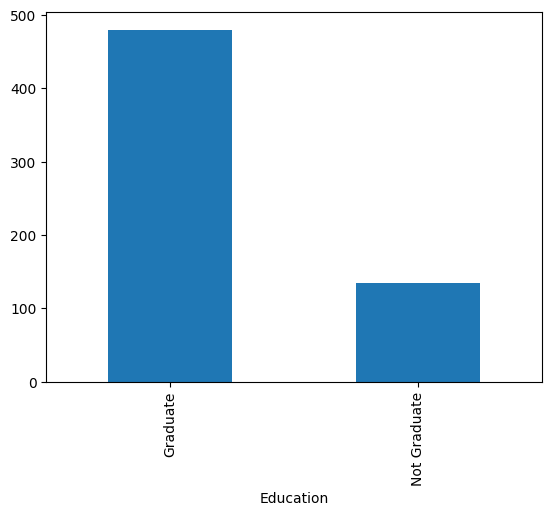

In [22]:
train_data['Education'].value_counts().plot.bar()

<Axes: xlabel='Property_Area'>

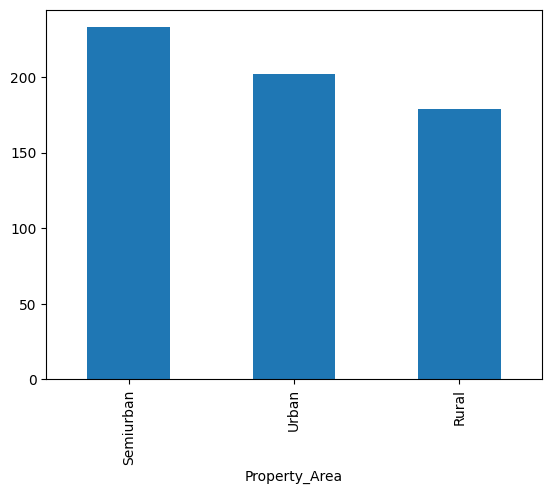

In [23]:
train_data['Property_Area'].value_counts().plot.bar()

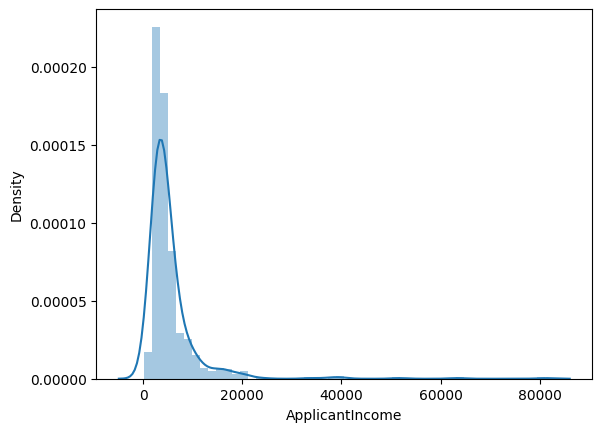

In [24]:
sns.distplot(train_data['ApplicantIncome'])
plt.show()

<Axes: >

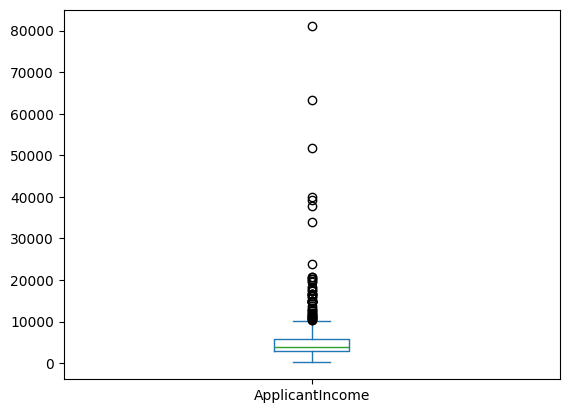

In [25]:
train_data['ApplicantIncome'].plot.box()

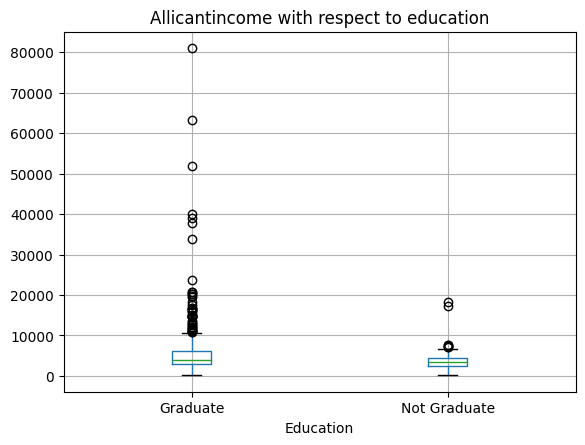

In [26]:
train_data.boxplot(column='ApplicantIncome', by= 'Education')
plt.suptitle('')
plt.title('Allicantincome with respect to education')
plt.show()

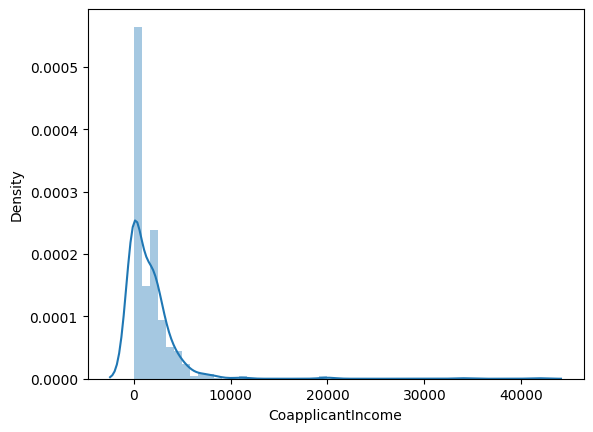

In [27]:
sns.distplot(train_data['CoapplicantIncome'])
plt.show()

<Axes: >

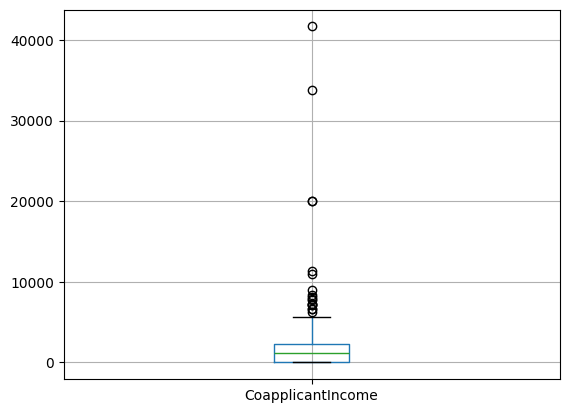

In [28]:
train_data.boxplot('CoapplicantIncome')

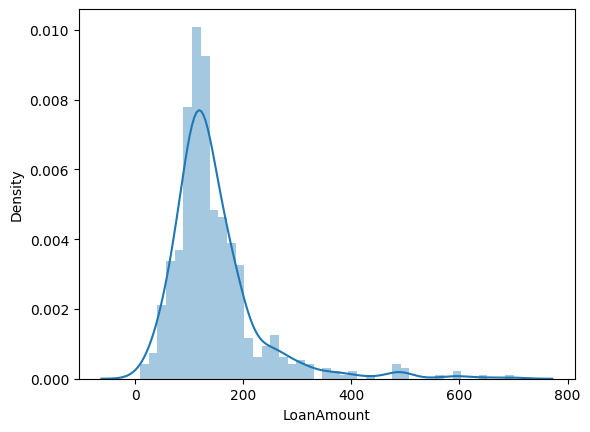

In [29]:
sns.distplot(train_data['LoanAmount'])
plt.show()

<Axes: >

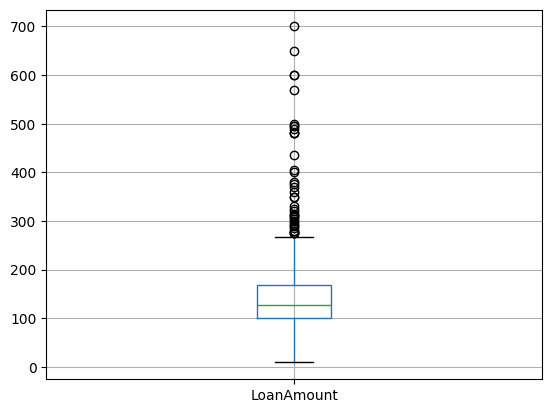

In [30]:
train_data.boxplot('LoanAmount')

<Axes: xlabel='Gender'>

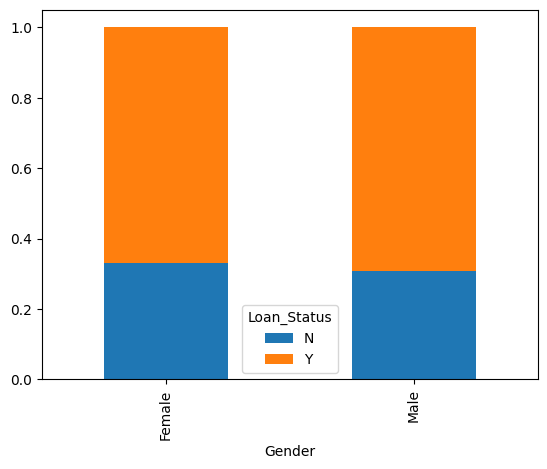

In [31]:
Gender=pd.crosstab(train_data['Gender'],train_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

<Axes: xlabel='Married'>

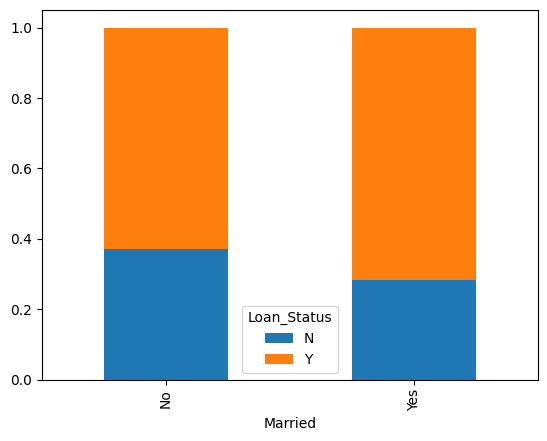

In [32]:
Married = pd.crosstab(train_data['Married'],train_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked =True)

<Axes: xlabel='Dependents'>

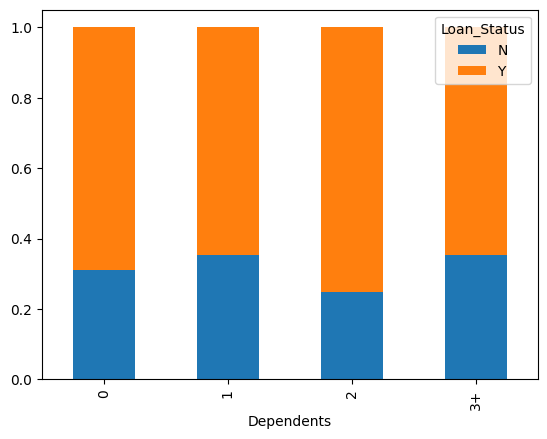

In [33]:
Dependents=pd.crosstab(train_data['Dependents'],train_data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<Axes: xlabel='Education'>

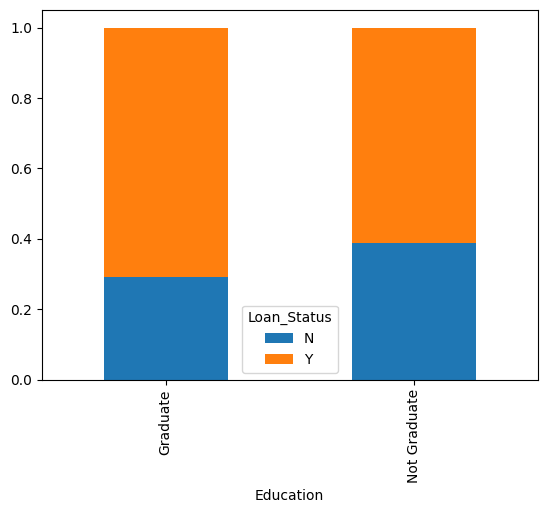

In [34]:
Education = pd.crosstab(train_data['Education'],train_data['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<Axes: xlabel='Self_Employed'>

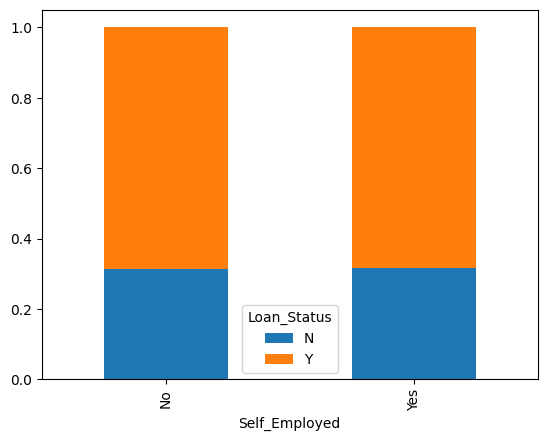

In [35]:
Self_Employed=pd.crosstab(train_data['Self_Employed'],train_data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [36]:
train_data.value_counts()

Loan_ID   Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP001003  Male    Yes      1           Graduate      No             4583             1508.0             128.0       360.0             1.0             Rural          N              1
LP001005  Male    Yes      0           Graduate      Yes            3000             0.0                66.0        360.0             1.0             Urban          Y              1
LP002347  Male    Yes      0           Graduate      No             3246             1417.0             138.0       360.0             1.0             Semiurban      Y              1
LP002345  Male    Yes      0           Graduate      No             1025             2773.0             112.0       360.0             1.0             Rural          Y              1
LP002342  Male    Yes      2           Graduate      Yes            1600             20000.0   

In [37]:
train_data['Dependents'].replace('3+',3,inplace=True)
test_data['Dependents'].replace('3+',3,inplace=True)
train_data['Loan_Status'].replace('Y',0,inplace=True)
train_data['Loan_Status'].replace('N',1,inplace=True)

In [38]:
#columns_to_drop = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area']
copied_train_data = train_data.copy()
copied_train_data.columns
copied_train_data = copied_train_data.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area'], axis=1)
copied_train_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

<Axes: >

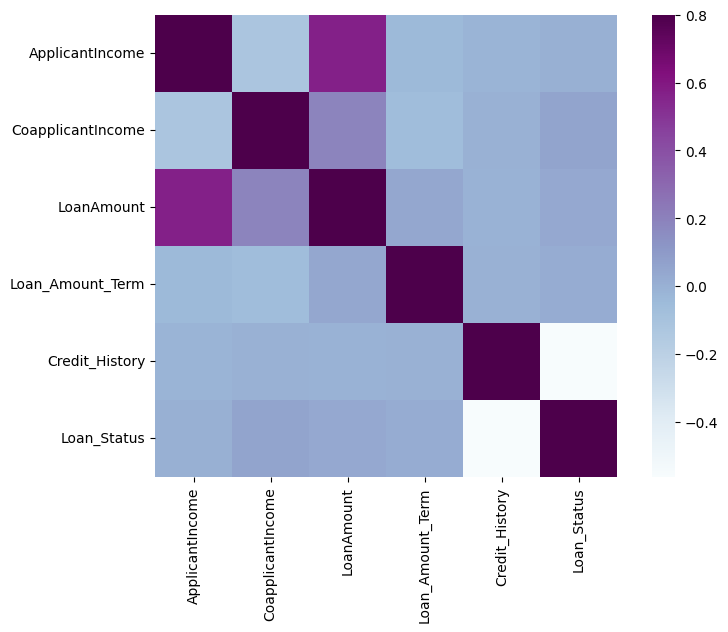

In [39]:
matrix = copied_train_data.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu')

In [40]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [41]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
values_to_be_checked=['Married','Gender','Dependents','Self_Employed','Credit_History','Loan_Amount_Term','LoanAmount']
train_data[values_to_be_checked].value_counts(dropna=False)

Married  Gender  Dependents  Self_Employed  Credit_History  Loan_Amount_Term  LoanAmount
No       Male    0           No             1.0             360.0             110.0         4
                                                                              NaN           4
Yes      Male    0           No             1.0             360.0             NaN           4
                                                                              110.0         4
                                                                              160.0         3
                                                                                           ..
No       NaN     0           No             1.0             360.0             96.0          1
                                                                              94.0          1
                 3           Yes            1.0             360.0             292.0         1
         Male    NaN         No             1.0             360.0

In [43]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0],inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0],inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace=True)

In [44]:
train_data['Married'].value_counts(dropna=False)

Married
Yes    401
No     213
Name: count, dtype: int64

In [45]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0],inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0],inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0],inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0],inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0],inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0],inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(),inplace=True)

In [46]:
train_data = train_data.drop('Loan_ID', axis=1)
test_data = test_data.drop('Loan_ID', axis=1)

In [47]:
x=train_data.drop('Loan_Status',axis=1)
y=train_data.Loan_Status
y

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 614, dtype: int64

In [48]:
x = pd.get_dummies(x)
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_cv,y_train,y_cv = train_test_split(x,y,test_size=0.3)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [52]:
model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [77]:
pred_cv = model.predict(x_cv)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
54,11500,0.0,286.0,360.0,0.0,True,False,False,True,False,False,True,False,True,False,False,True,False,False,True
376,8750,4996.0,130.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,True,False,True,False,False
252,2583,2167.0,104.0,360.0,1.0,False,True,True,False,False,True,False,False,False,True,False,True,True,False,False
174,4344,736.0,87.0,360.0,1.0,False,True,False,True,False,True,False,False,False,True,False,True,False,True,False
353,5500,0.0,105.0,360.0,0.0,True,False,False,True,False,True,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1782,2232.0,107.0,360.0,1.0,False,True,False,True,False,False,True,False,True,False,True,False,True,False,False
218,5000,0.0,72.0,360.0,0.0,False,True,False,True,False,False,False,True,True,False,True,False,False,True,False
59,3357,2859.0,144.0,360.0,1.0,False,True,False,True,False,False,False,True,False,True,True,False,False,False,True
361,5000,3667.0,236.0,360.0,1.0,False,True,False,True,False,False,False,True,True,False,True,False,False,True,False


In [64]:
LR_accuracy = accuracy_score(y_cv,pred_cv)
print(LR_accuracy)

0.8486486486486486


Confusion Matrix:
[[133   4]
 [ 24  24]]


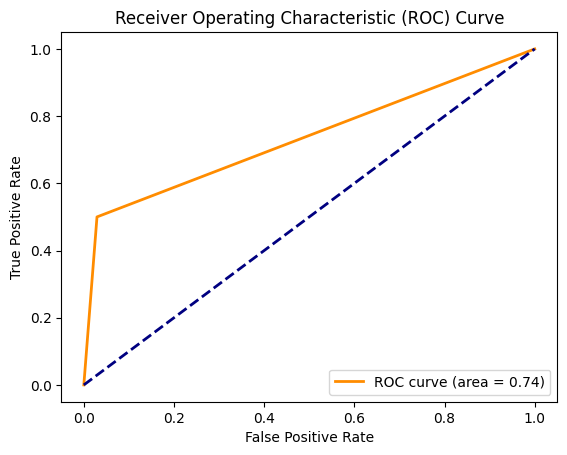

In [73]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
conf_matrix = confusion_matrix(y_cv, pred_cv)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_cv, pred_cv)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [91]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_recall_curve, precision_score, recall_score, classification_report
     

In [88]:
pred_list = pred_cv.tolist()
pred_list
f1 = f1_score(y_cv,pred_list)
roc_auc = roc_auc_score(y_cv,pred_list)
precision, recall, _ = precision_recall_curve(y_cv,pred_list)

print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')


F1 Score: 0.6316
ROC AUC Score: 0.7354


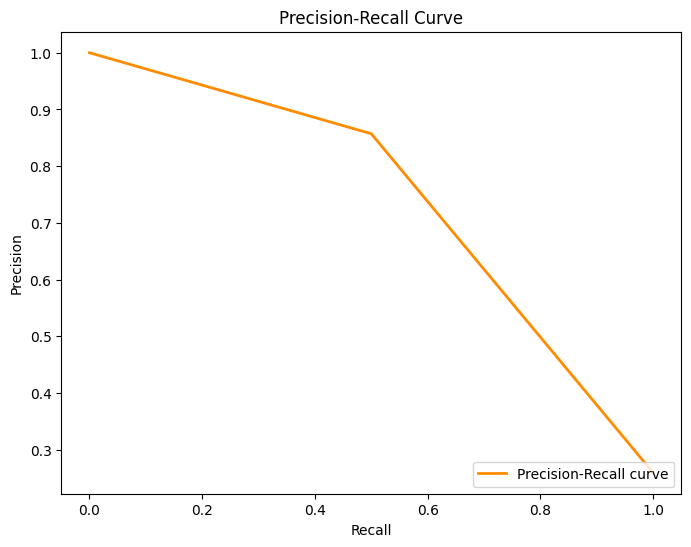

In [89]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

In [92]:
print(classification_report(y_cv,pred_list))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       137
           1       0.86      0.50      0.63        48

    accuracy                           0.85       185
   macro avg       0.85      0.74      0.77       185
weighted avg       0.85      0.85      0.83       185

